### 로지스틱 회귀
: 선형회귀란 단어가 있지만, 이거는 분류에 대한 확률을 계산하는 모델

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
import pandas as pd

fish = pd.read_csv("../data/fishes.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [89]:
# Target으로 사용될 Species의 종류
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### Featrue와 타겟 분류

In [90]:
# Feature
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [91]:
# Target Data
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

### Train과 Test분리하기



In [92]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input,
    fish_target,
    # stratify=fish_target, ## 안쓴대..?
    random_state=42,
    test_size=0.2
)

### 표준화 시키기

In [93]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [94]:
train_scaled[:5]

array([[-0.95631423, -1.14878727, -1.22092909, -1.06273398, -1.10441696],
       [ 0.51397533,  1.65907911,  1.53608537, -0.25944123,  0.27042307],
       [-0.13346547, -0.17828312, -0.00434176,  0.89187139,  0.16361254],
       [-0.76094112, -0.60228979, -0.6695262 , -0.68172477, -0.62785406],
       [-0.64685464, -0.55517794, -0.51198251, -0.44989563, -0.37430959]])

In [95]:
test_scaled[:5]

array([[-0.88073193, -0.91322801, -1.0283757 , -0.91039055, -0.80235016],
       [-1.0649816 , -1.50683735, -1.54476888, -1.60562691, -1.94133485],
       [-0.53276816,  0.36821437,  0.31949804, -0.81779949, -0.64744725],
       [-0.33311681, -0.22539497, -0.2144    , -0.11171732, -0.11185911],
       [-0.67537626, -0.50806608, -0.58200193, -0.90554508, -0.49364992]])

---
### KNN을 이용한 확률 예측

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print("train score :", kn.score(train_scaled, train_target))
print("test score :", kn.score(test_scaled, test_target))


train score : 0.8976377952755905
test score : 0.875


In [98]:
# kn의 분류 정보

kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [99]:
# test data로 예측하기
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [100]:
# test data의 확률예측값 보기
import numpy as np

prob = kn.predict_proba(test_scaled[:5])
np.round(prob, 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [101]:
kn.classes_[prob.argmax(axis=1)]

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [102]:
# test data의 3번째에 대한 이웃들을 확인해보자;

distance, indexes = kn.kneighbors(test_scaled[3:4])
indexes


array([[112, 123, 114]])

In [103]:
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

> KNN은 이웃의 갯수를 정하는 모델이다.  
현재 이웃의 갯수를 3으로 하였기 때문에 확률로 나올 수 있는 경우의 수는 3가지.. 4가지지 (0, 1/3, 2/3, 3/3)이다.  
확률로서는 좀 부족한감이 있다..

---
### 로지스틱 회귀를 이용한 확률 예측
- 데이터의 각 컬럼을 새로운 변수로 사용하는 다중회귀를 이용한 확률  
- 회귀식을 사용해서 로지스틱 회귀라고 하나 실질적으로 확률을 예측하는 모델임.  
- 선형회귀식에서 출발하였고, 딥러닝 모델의 기반.  


기본적으로 위의 데이터를 보면  
z = a * 무게 + b * 길이 + c * 대각선 d * 높이 + e * 두께 + f 로 구성되어 있다.  
위의 z식을 이용하면 나오는 결과값은 -무한대 ~ + 무한대의 범위로 결과값이 출력된다.  
이를 해결하는 방법이 sigmoid함수를 사용한다.

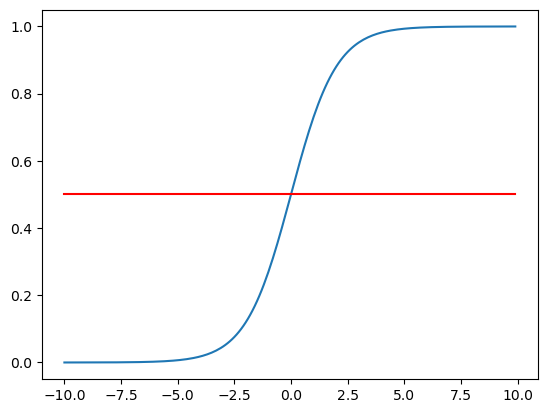

In [104]:
# Sigmoid Graph 출력

import matplotlib.pyplot as plt

z = np.arange(-10, 10, 0.1)

y = np.full((200, 1), 0.5)


phi = 1/(1 + np.exp(-z))


plt.plot(z, phi)

plt.plot(z, y, c = 'red')


plt.show()

> 실질적으로 x의 값이 0 이상이면 양성클래스, 0이하이면 음성클래스로 분류. 이를 이용하는 것이 predict함수이다.  
각각의 확률 수치를 알아보는 것이 predict_proba 함수이다.  

---
### 로지스틱 회귀로 이진 분류 수행하기

In [105]:
# 2종류의 데이터만 발췌하기

bream_smelt_indexes =  (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt[:5])
print(target_bream_smelt[:5])

[[-0.13346547 -0.17828312 -0.00434176  0.89187139  0.16361254]
 [ 0.95035613  0.62261837  0.8271388   1.89209588  1.01975511]
 [-1.08180936 -1.68586239 -1.71106499 -1.72061256 -2.00828337]
 [ 0.66513992  0.57550652  0.74836696  1.68143113  0.52230919]
 [ 0.32288047  0.24572355  0.44203202  1.39238533  0.23639602]]
['Bream' 'Bream' 'Smelt' 'Bream' 'Bream']


In [106]:
target_bream_smelt

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Smelt', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [107]:
# 로지스틱 회귀 실행하기

from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)


LogisticRegression()

In [108]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [109]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [110]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.95636638, 0.04363362],
       [0.99795723, 0.00204277],
       [0.02735107, 0.97264893],
       [0.99556172, 0.00443828],
       [0.98758154, 0.01241846]])

In [111]:
# 회귀식의 가중치(기울기)와 Bias(절편) 확인 

print(lr.coef_, lr.intercept_)

[[-0.40431455 -0.57100332 -0.65957835 -1.02674369 -0.739561  ]] [-2.20921428]


In [112]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [113]:
# 다중식으로 계산
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-3.08731304, -6.19140569,  3.57126757, -5.4130411 , -4.37607539])

In [114]:
my_decision = (train_bream_smelt[:5] * lr.coef_).sum(axis = 1) + lr.intercept_ 
my_decision

array([-3.08731304, -6.19140569,  3.57126757, -5.4130411 , -4.37607539])

In [115]:
from scipy.special import expit
print(expit(decisions))

[0.04363362 0.00204277 0.97264893 0.00443828 0.01241846]


In [116]:

1/ (1+ np.exp(decisions))


array([0.95636638, 0.99795723, 0.02735107, 0.99556172, 0.98758154])

In [117]:
1/ (1+ np.exp(my_decision))

array([0.95636638, 0.99795723, 0.02735107, 0.99556172, 0.98758154])

---
### 로지스틱 회귀로 다중 분류 수행하기


In [118]:
lr = LogisticRegression(max_iter=1000, C = 10) # max_iter : 반복횟수(100), C: 규제(1) 적은 숫자가 강한 규제

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9133858267716536
0.90625


In [119]:
# test data로 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [120]:
# test data의 확룰
proba = lr.predict_proba(test_scaled[:5])

np.round(proba, 3)

array([[0.   , 0.02 , 0.784, 0.001, 0.18 , 0.011, 0.004],
       [0.   , 0.007, 0.068, 0.   , 0.013, 0.912, 0.   ],
       [0.   , 0.   , 0.057, 0.896, 0.041, 0.005, 0.   ],
       [0.018, 0.034, 0.385, 0.011, 0.487, 0.   , 0.064],
       [0.   , 0.001, 0.855, 0.004, 0.134, 0.003, 0.003]])

In [121]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [122]:
# 사용된 다중 회귀의 가중치와 절편 확인
print(lr.coef_, lr.intercept_)

[[-1.05683371 -0.73998896  1.83285281  6.16136303 -0.7027663 ]
 [-0.21684472 -1.58655203 -2.68007924  5.26566964 -2.09610855]
 [ 3.19229657  4.15841485 -6.0987118  -4.6283449   3.16887536]
 [-0.05831314  3.12654133  3.40187969 -2.89909748 -1.40300218]
 [-1.49764623 -3.97484611  3.61530798 -0.83084028  1.61788901]
 [-0.90366298  0.48060961  0.45782914 -4.03106336 -3.59728922]
 [ 0.54100422 -1.4641787  -0.52907859  0.96231336  3.01240188]] [ 0.08077865 -0.43064646  3.17119539 -0.01025748  2.34232613 -6.18468907
  1.03129284]


> 다중 회귀인 경우 각 분류별로 회귀식을 구성하여 계산한다.  
이진분류처럼 클래스 하나를 계산하고 나머지 클래스는 1에서 빼기를 통한 확률로는 구할 수 없어서  
각 컬럼과 각 Traget을 일일히 계산해야 한다.

---
### 확률분포 검증

In [123]:
decisions = lr.decision_function(test_scaled[:5])

print(np.round(decisions, 3))


[[-5.243  0.853  4.505 -2.548  3.032  0.258 -0.857]
 [-9.039  1.946  4.206 -2.536  2.535  6.802 -3.914]
 [-3.627 -4.705  2.786  5.538  2.464  0.246 -2.702]
 [-0.403  0.22   2.641 -0.944  2.874 -5.237  0.85 ]
 [-5.129 -1.652  5.079 -0.221  3.223 -0.659 -0.641]]


계산할 항목이 여러개이므로 이를 Sigmoid를 사용하면 각각의 값이 생성되어 확률의 합이 1이 넘는 경우가 발생한다.  
다중항목인 경우에는 softmax를 사용한다.

In [124]:
from scipy.special import softmax

In [125]:
proba = softmax(decisions, axis = 1)
print(np.round(proba, 3))

[[0.    0.02  0.784 0.001 0.18  0.011 0.004]
 [0.    0.007 0.068 0.    0.013 0.912 0.   ]
 [0.    0.    0.057 0.896 0.041 0.005 0.   ]
 [0.018 0.034 0.385 0.011 0.487 0.    0.064]
 [0.    0.001 0.855 0.004 0.134 0.003 0.003]]


In [126]:

proba = softmax(decisions, axis = 1)

print(np.round(proba, 3))


[[0.    0.02  0.784 0.001 0.18  0.011 0.004]
 [0.    0.007 0.068 0.    0.013 0.912 0.   ]
 [0.    0.    0.057 0.896 0.041 0.005 0.   ]
 [0.018 0.034 0.385 0.011 0.487 0.    0.064]
 [0.    0.001 0.855 0.004 0.134 0.003 0.003]]


----
# 확률적 경사 하강법의 분류 알고리즘 적용

In [127]:
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법 분류 모델

In [128]:
sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42) ### log_loss : 로지스틱 손실함수, max_iter : Epoch

In [129]:
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [130]:
print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.7480314960629921
test score : 0.84375


> socre가 별로 안좋고, 과소적합됐엉..  
partial_fit을 사용한다.  기존 w와 b값의 계수를 유지한 채 update하는 방법  
만약에 다시 fit을 사용하면 기존에 학습햇던 내용을 모두 버린다.  

In [190]:
sc.partial_fit(train_scaled, train_target)
print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.9291338582677166
test score : 0.90625


> 처음의 점수보다 기존에 학습했던 내용에 새로운 학습 내용을 수정하여 사용하면 점수가 증가한다.  
이와 같이 점진적으로 정확도를 높이는 방법이 확률적 경사 하강법이다.  
처음보다는 점수가 증가했지만, 아직 과소적합이다. 약간의 차이가 나는 과대적합이 제일 좋은 방법이다. 

In [191]:
classes = np.unique(train_target)

classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [193]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

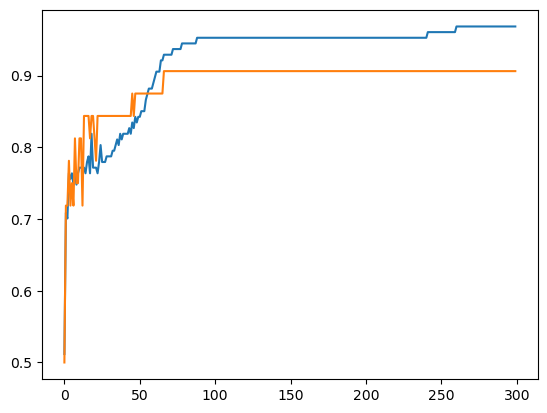

In [194]:
# 그래프로 보기
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)

plt.show()

> 100정도의 Epoch가 좋을 것 같다...!

---
### 새롭게 시작

In [205]:
sc = SGDClassifier(loss = 'log_loss', max_iter=100, random_state=42, tol=None)
# tol : 조기종료 시점이나, 현재는 정지기준이 없어서 None으로 바꿈 ㅇㅇ
sc.fit(train_scaled, train_target)


print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.8661417322834646
test score : 0.875


### 조기 종료 시점 적용

In [206]:
sc = SGDClassifier(loss = 'log_loss', max_iter=100, random_state=42, tol = 1.0e-3) # tol : 0.001 
# tol : 조기종료 시점이나, 현재는 정지기준이 없어서 None으로 바꿈 ㅇㅇ
sc.fit(train_scaled, train_target)


print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.8661417322834646
test score : 0.90625


---
### SVM을 이용하는 확률적 경사하강법


In [209]:
sc = SGDClassifier(loss = 'hinge', max_iter=100, random_state=42, tol=None)
# tol : 조기종료 시점이나, 현재는 정지기준이 없어서 None으로 바꿈 ㅇㅇ
sc.fit(train_scaled, train_target)


print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.8267716535433071
test score : 0.9375


In [208]:
sc = SGDClassifier(loss = 'hinge', max_iter=100, random_state=42, tol = 1.0e-3) # tol : 0.001 
# tol : 조기종료 시점이나, 현재는 정지기준이 없어서 None으로 바꿈 ㅇㅇ
sc.fit(train_scaled, train_target)


print("train score :", sc.score(train_scaled, train_target))
print("test score :", sc.score(test_scaled, test_target))

train score : 0.8503937007874016
test score : 0.90625
